In [1]:
import json
import sys
import os

import pprint as pp

sys.path.append('benchmarking/')
import util

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

{'2009': {'__': {'avg': 0.1404,
                 'count': 50,
                 'max': 0.1888,
                 'min': 0.1332,
                 'std': 0.0085,
                 'timestamp': '2024-5-18-20:51:31'},
          '__datetime_in_reviews__': {'avg': 0.0145,
                                      'count': 50,
                                      'max': 0.0178,
                                      'min': 0.0135,
                                      'std': 0.0007,
                                      'timestamp': '2024-5-18-20:54:1'},
          '__datetime_in_reviews__id_in_listings__': {'avg': 0.0229,
                                                      'count': 50,
                                                      'max': 0.0311,
                                                      'min': 0.019,
                                                      'std': 0.0016,
                                                      'timestamp': '2024-5-18-20:58:11'},
          '__id_in_li

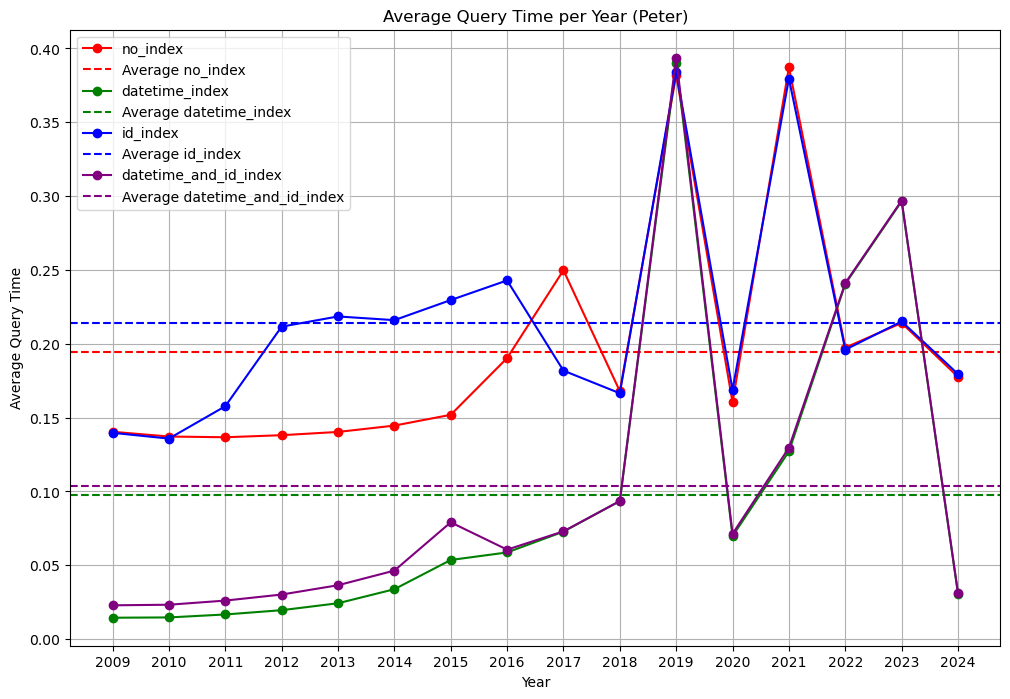

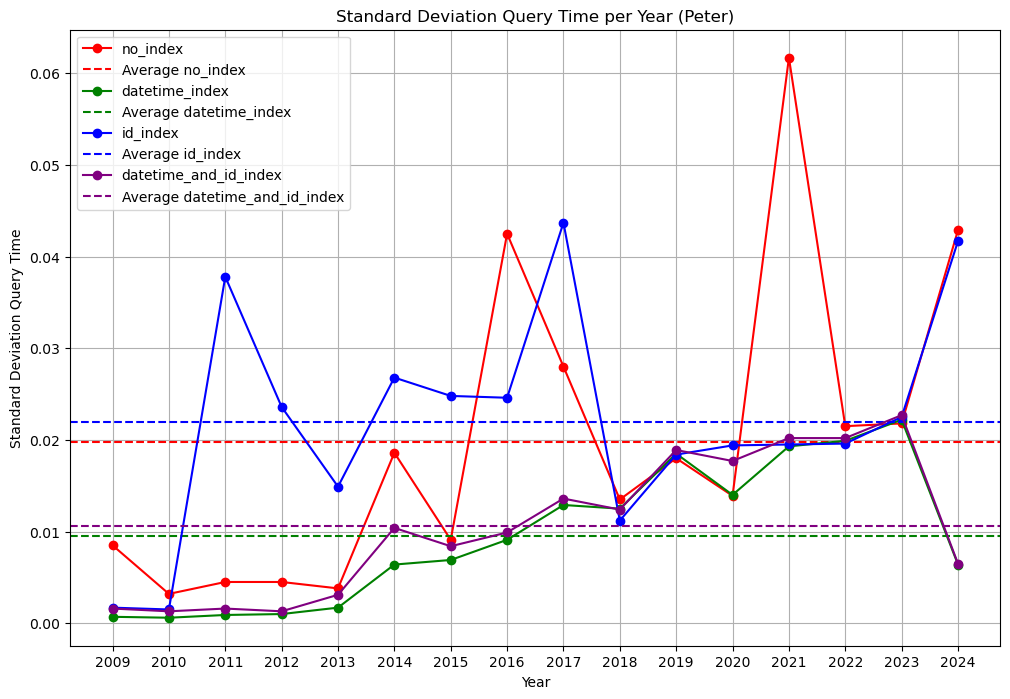

In [3]:
# CREATE ALL OF THE PLOTS
filenames = ["listings_join_reviews.json"]
rename_data = ["q_listings_join_review", "horrible", "awesome", "apartment", "update_datetimes_query"]


key_labels = [{
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__id_in_listings__": "id_index",
    "__datetime_in_reviews__id_in_listings__": "datetime_and_id_index"
},{
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "comments_tsv_and_datetime_index"
},{
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "comments_tsv_and_datetime_index"
},{
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "comments_tsv_and_datetime_index"
},{
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "comments_tsv_and_datetime_index"
}
]

for i, filename in enumerate(filenames):
    key_label = key_labels[i]
    rename_string = rename_data[i]
    
    # Load JSON data from a file
    with open('perf_data/' + filename, 'r') as file:
        data = json.load(file)
    
    # Printing the loaded file
    #print(json.dumps(data, indent=4, sort_keys=True))
    
    data_renamed = util.rename_keys(data, rename_string)
    pp.pprint(data_renamed)
    
    avg_values = util.extract_values_with_metric(data_renamed, 'avg')
    pp.pprint(avg_values)
    std_values = util.extract_values_with_metric(data_renamed, 'std')
    
    # Prepare data for DataFrame
    data_for_df_avg = {label: [] for label in key_label.values()}
    data_for_df_avg['Year'] = sorted(avg_values.keys())
    
    data_for_df_std = {label: [] for label in key_label.values()}
    data_for_df_std['Year'] = sorted(std_values.keys())

    for year in data_for_df_avg['Year']:
        for key, label in key_label.items():
            data_for_df_avg[label].append(avg_values[year].get(key, None))
            data_for_df_std[label].append(std_values[year].get(key, None))

    # Create DataFrame
    df_avg = pd.DataFrame(data_for_df_avg)
    df_std = pd.DataFrame(data_for_df_std)

    # Set 'Year' as the index
    df_avg.set_index('Year', inplace=True)
    df_std.set_index('Year', inplace=True)

    # Display the DataFrame
    print(df_avg)
    
    for df, name in zip([df_avg, df_std],["Average","Standard Deviation"]):
    # Show the Plot for Average
        plt.figure(figsize=(12, 8))
        colors = ['red', 'green', 'blue', 'purple']
        # Calculate and plot average lines for each index across all years
        for idx, label in enumerate(key_label.values()):
            plt.plot(df.index, df[label], marker='o', label=label, color = colors[idx])
            avg_value = df[label].mean()
            plt.axhline(y=avg_value, linestyle='--', color=colors[idx], label=f'Average {label}')

        plt.title(f'{name} Query Time per Year (Peter)')
        plt.xlabel('Year')
        plt.ylabel(f'{name} Query Time')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    